In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df=pd.read_csv("../../Data/FuentesOriginales/USAR/world_population.csv")
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [3]:
df.sort_values(["Rank"], axis=0, ascending=True, inplace=True)
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96


In [4]:
dg = df.copy()

In [10]:
import plotly.express as px
dg = df.copy()
dg['Growth Rate'] = (dg['Growth Rate']*10000)-10000
dg['Growth Rate'] = dg['Growth Rate'].astype(int)
dg.dtypes
gr = dg.groupby(['Country/Territory']).sum(numeric_only=True)['Growth Rate']
gr = gr.sort_values(ascending = False)
fig = px.bar(y = gr.values, x = gr.index, 
            text = gr.values, title = 'Tasa de crecimiento de la poblacion',
            color_discrete_sequence=["green"])
fig.update_layout(xaxis_title = "Pais/Ciudad", yaxis_title = "Tasa de Crecimiento")
fig.show()
fig.write_html("growth_rate.html")

In [7]:
df1 = df.sort_values(by=['World Population Percentage'], ascending=False)[:10]
fig = px.pie(df1, values='World Population Percentage', names='Country/Territory', 
    title='Top 10 Poblacion Mundial')
fig.show();
fig.write_html("top15_pop_dist.html")

TREEMAP

In [6]:
df22 = df[['Continent','Country/Territory','2022 Population']].copy()
df22['Year'] = 2022
df22['Population'] = df22['2022 Population']
df22.drop('2022 Population', axis=1, inplace=True)
df20 = df[['Continent','Country/Territory','2020 Population']].copy()
df20['Year'] = 2020
df20['Population'] = df20['2020 Population']
df20.drop('2020 Population', axis=1, inplace=True)
df15 = df[['Continent','Country/Territory','2015 Population']].copy()
df15['Year'] = 2015
df15['Population'] = df15['2015 Population']
df15.drop('2015 Population', axis=1, inplace=True)
df10 = df[['Continent','Country/Territory','2010 Population']].copy()
df10['Year'] = 2010
df10['Population'] = df10['2010 Population']
df10.drop('2010 Population', axis=1, inplace=True)
df00 = df[['Continent','Country/Territory','2000 Population']].copy()
df00['Year'] = 2000
df00['Population'] = df00['2000 Population']
df00.drop('2000 Population', axis=1, inplace=True)
df90 = df[['Continent','Country/Territory','1990 Population']].copy()
df90['Year'] = 1990
df90['Population'] = df90['1990 Population']
df90.drop('1990 Population', axis=1, inplace=True)
df80 = df[['Continent','Country/Territory','1980 Population']].copy()
df80['Year'] = 1980
df80['Population'] = df80['1980 Population']
df80.drop('1980 Population', axis=1, inplace=True)
df70 = df[['Continent','Country/Territory','1970 Population']].copy()
df70['Year'] = 1970
df70['Population'] = df70['1970 Population']
df70.drop('1970 Population', axis=1, inplace=True)

dfx = pd.concat([df22, df20, df15, df10, df00, df90, df80, df70])

dfpop = dfx.groupby(['Year','Continent','Country/Territory']).sum(numeric_only=True)['Population']
dfpop = dfpop.reset_index()
fig = px.treemap(dfpop, path=['Year','Continent','Country/Territory'], values='Population', color = 'Population', color_continuous_scale='Viridis_r')
fig.show()
fig.write_html("worlp_population.html")

EVOLUCION DE LA POBLACION

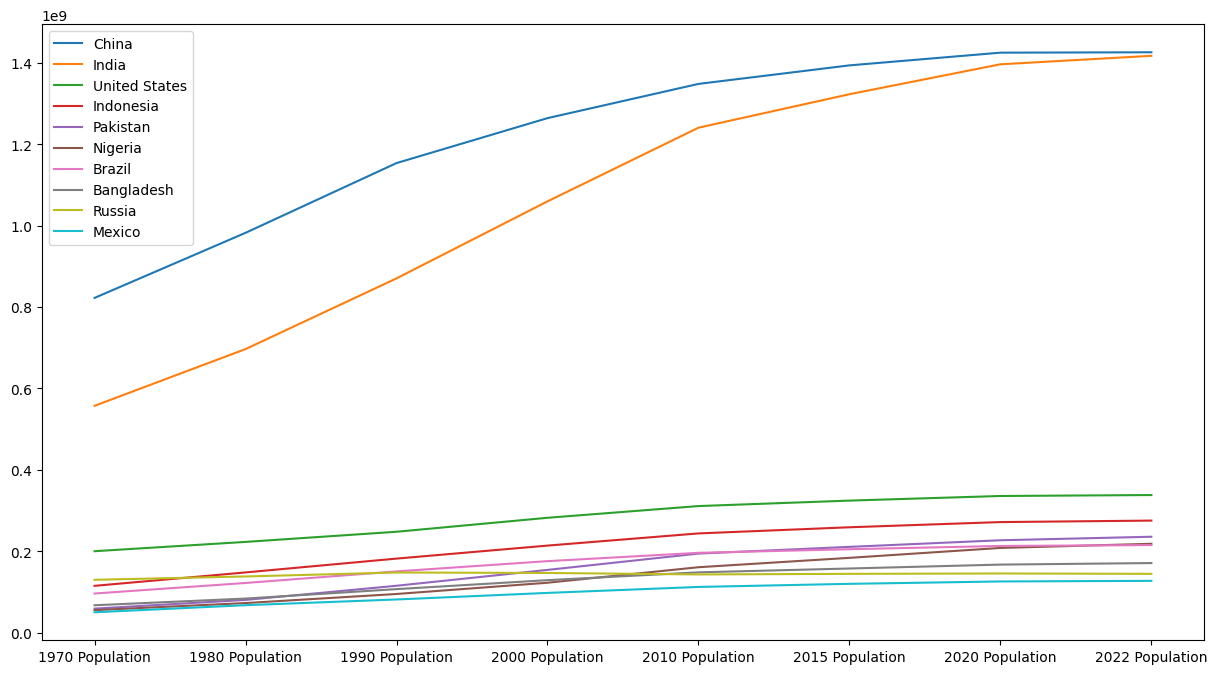

In [11]:
dfx = pd.concat([df22, df20, df15, df10, df00, df90, df80, df70])
dfx.drop('Continent',axis=1,inplace=True)
dfy = df[['Country/Territory', '1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']]
dfy = dfy.transpose()
cols = dfy.iloc[0].to_list()
dfy.columns = cols
dfy = dfy.iloc[1:, :]
for i in dfy.columns:
    dfy[i] = dfy[i].astype(int)
dfy = dfy.iloc[:,:10]
dfy.plot(figsize=(15, 8));

In [12]:
cols = ['2022 Population','2020 Population', '2015 Population', '2010 Population','2000 Population', '1990 Population', '1980 Population',
'1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate','World Population Percentage']
xols = ['2022 Population','Area (km²)', 'Density (per km²)']

In [13]:
for i in xols:    
    df_cc = df.groupby(['Continent','Country/Territory']).sum(numeric_only=True)[i]
    df_cc = df_cc.reset_index()
    fig = px.treemap(df_cc, path=['Continent','Country/Territory'], values=i, color =i, color_continuous_scale='Viridis_r', title=f'{i} Treemap')
    fig.show()
    fig.write_html(f"{i} heatmap.html")